In [1]:
import numpy as np
import cvxpy as cp
from util_circle_packing import plot_circles
import matplotlib.pyplot as plt

In [2]:
# data generation
rng = np.random.default_rng(0)
n = 10
radius = rng.uniform(1.0, 3.0, n)
init_centers = rng.uniform(-5.0, 5.0, (2, n))

In [3]:
# build and solve optimization problem
centers = cp.Variable((n, 2), name='c')
constraints = []
for i in range(n - 1):
    constraints += [cp.sum((centers[i, :] - centers[i+1:, :]) ** 2, axis=1) >=
                     (radius[i] + radius[i+1:]) ** 2]

# initialize centers to random locations
centers.value = init_centers.T

obj = cp.Minimize(cp.max(cp.norm_inf(centers, axis=1) + radius))
prob = cp.Problem(obj, constraints)



******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

Total number of variables............................:      121
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       90
Total number of inequality constraints...............:       95
        inequality constraints with only lower bounds:       95
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0


Number of Iterations....: 50

    

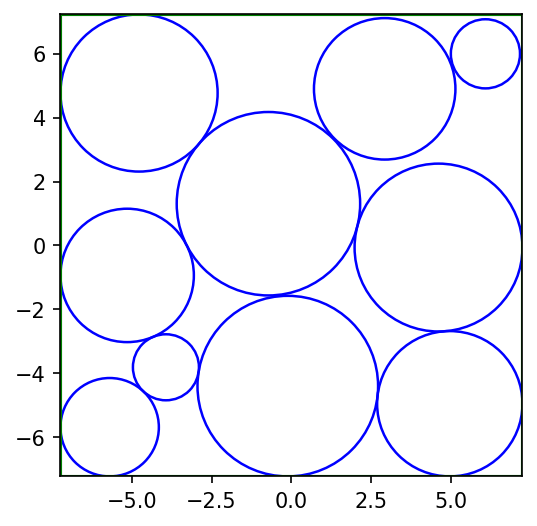

In [4]:
prob.solve(solver=cp.IPOPT, nlp=True, verbose=False, derivative_test='none')
L = prob.value
plot_circles(centers.value.T, radius, L, filename="circle_packing_initial.pdf")

In [5]:
# test best-of
centers.sample_bounds = [-5.0, 5.0]  
prob.solve(solver=cp.IPOPT, nlp=True, verbose=True, best_of=500, derivative_test='none')

(CVXPY) Nov 27 09:48:42 AM: Your problem has 20 variables, 45 constraints, and 0 parameters.
(CVXPY) Nov 27 09:48:42 AM: It is compliant with the following grammars: 
(CVXPY) Nov 27 09:48:42 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Nov 27 09:48:42 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Nov 27 09:48:42 AM: Your problem is compiled with the CPP canonicalization backend.


                                     CVXPY                                     
                             v1.7.0.dev0+0.5870139                             
Starting NLP solve 1 of 500
This is Ipopt version 3.11.9, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      270
Number of nonzeros in inequality constraint Jacobian.:      190
Number of nonzeros in Lagrangian Hessian.............:       90

Total number of variables............................:      121
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       90
Total number of inequality constraints...............:       95
        inequality constraints with only lower bounds:       95
   inequality constraints wi

7.007653279537189

  53  7.3383400e+00 1.78e-15 9.24e-07  -5.9 1.12e-01    -  1.00e+00 1.00e+00h  1
  54  7.3383194e+00 1.78e-15 2.09e-09 -11.0 1.46e-03    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 54

                                   (scaled)                 (unscaled)
Objective...............:   7.3383193655734340e+00    7.3383193655734340e+00
Dual infeasibility......:   2.0889797253120790e-09    2.0889797253120790e-09
Constraint violation....:   1.7763568394002505e-15    1.7763568394002505e-15
Complementarity.........:   5.0454779843807383e-10    5.0454779843807383e-10
Overall NLP error.......:   2.0889797253120790e-09    2.0889797253120790e-09


Number of objective function evaluations             = 61
Number of objective gradient evaluations             = 55
Number of equality constraint evaluations            = 61
Number of inequality constraint evaluations          = 61
Number of equality constraint Jacobian evaluations   = 55
Number of inequality constraint Jacobian evaluations = 55
N

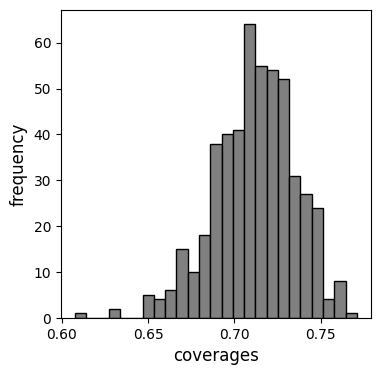

In [8]:
all_objs = prob.solver_stats.extra_stats['all_objs_from_best_of']
square_size = all_objs * 2
pi = np.pi
ratios = pi * np.sum(np.square(radius)) / (square_size**2)

# plot histogram
best_centers = centers.value
fig = plt.figure(figsize=(4, 4))
plt.hist(ratios, bins=25, color='gray', edgecolor='black')
plt.xlabel('coverages', fontsize=12)
plt.ylabel('frequency', fontsize=12)
plt.savefig("circle_packing_histogram.pdf")

Circle packing (ratio=0.771)


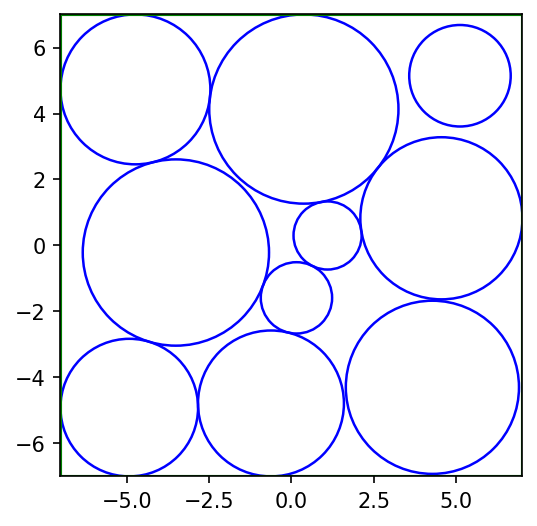

In [9]:
best_centers = centers.value
plot_circles(best_centers.T, radius, prob.value, filename="circle_packing_best.pdf")